<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.017297,-0.009332,41.007965,41.005893,0.002072
1,0.0,1.0,46.142576,-0.019861,56.122716,56.134154,-0.011438
2,0.0,2.0,64.535555,-0.009484,74.526071,74.530758,-0.004687
3,0.0,3.0,64.995097,0.004047,74.999144,74.990391,0.008753
4,0.0,4.0,95.677372,-0.002486,105.674886,105.678714,-0.003828
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.300136,-0.021753,53.278384,53.300180,-0.021797
29996,999.0,26.0,91.919657,0.001732,101.921389,101.921081,0.000308
29997,999.0,27.0,39.384069,0.010017,49.394086,49.384002,0.010083
29998,999.0,28.0,75.815444,-0.005676,85.809768,85.816411,-0.006643


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.017297,-0.009332,41.007965,41.005893,0.002072
1,0.0,1.0,46.142576,-0.019861,56.122716,56.134154,-0.011438
2,0.0,2.0,64.535555,-0.009484,74.526071,74.530758,-0.004687
3,0.0,3.0,64.995097,0.004047,74.999144,74.990391,0.008753
4,0.0,4.0,95.677372,-0.002486,105.674886,105.678714,-0.003828
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.300136,-0.021753,53.278384,53.300180,-0.021797
29996,999.0,26.0,91.919657,0.001732,101.921389,101.921081,0.000308
29997,999.0,27.0,39.384069,0.010017,49.394086,49.384002,0.010083
29998,999.0,28.0,75.815444,-0.005676,85.809768,85.816411,-0.006643


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

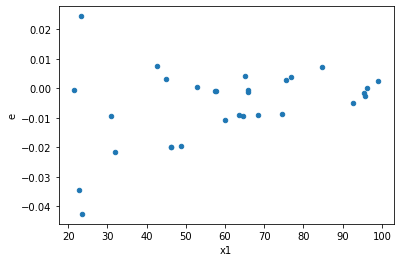

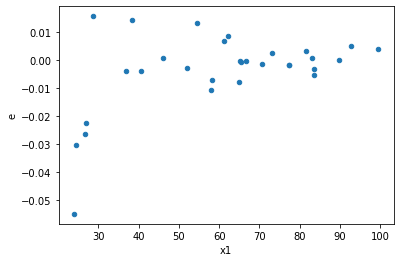

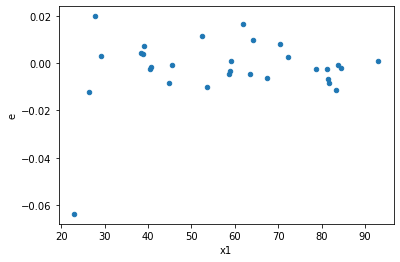

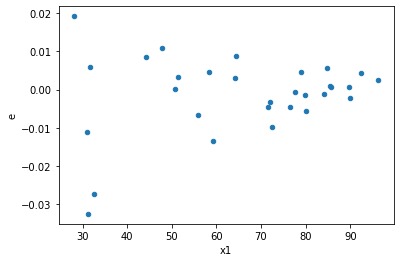

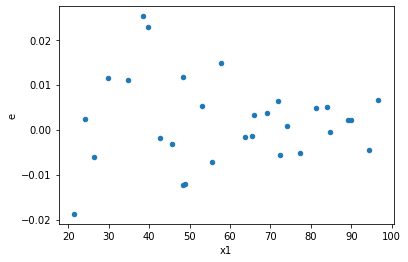

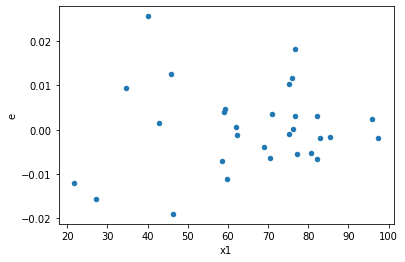

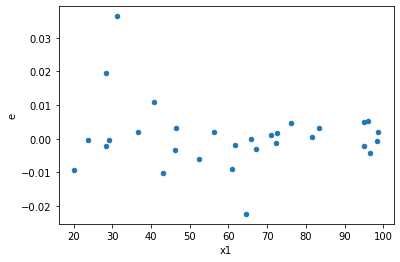

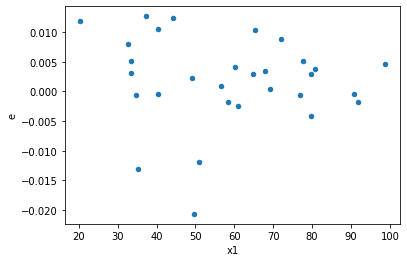

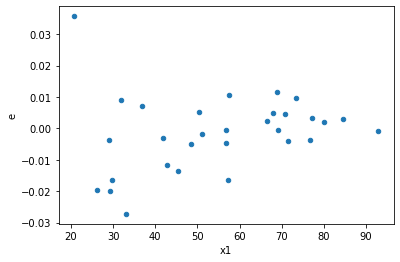

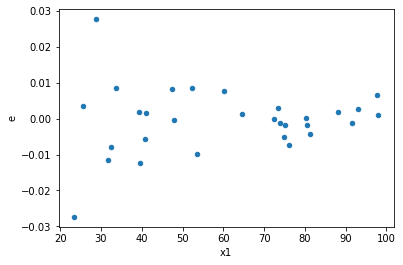

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,17.0,11.0,0.0004418133126843742,0.0038565443839012033,2.598901839319848e-05,0.00035059494399101846,13.490118737334525,9.859628983632795e-05,0.9999507018550818,4.929814491816398e-05,Reject001=0 : Heteroscedasticity
5.0,22.0,6.0,0.0009833474236153547,0.0014346590476158724,4.46976101643343e-05,0.00023910984126931207,5.349499456239513,0.04526941082550762,0.9773652945872462,0.02263470541275381,Reject001=1 : Homoscedasticity
8.0,15.0,13.0,0.0006991988815265839,0.003257074991777985,4.661325876843892e-05,0.00025054423013676805,5.374956326941198,0.004153571493364705,0.9979232142533176,0.0020767857466823525,Reject001=0 : Heteroscedasticity
10.0,15.0,13.0,0.0001699417958498738,0.0005756365470998908,1.1329453056658253e-05,4.427973439229929e-05,3.908373526140907,0.018019326219013143,0.9909903368904934,0.009009663109506572,Reject001=1 : Homoscedasticity
16.0,10.0,18.0,0.00020106590336553713,0.0037471535622840987,2.0106590336553713e-05,0.00020817519790467215,10.353580314719515,2.7705708369962778e-05,0.999986147145815,1.3852854184981389e-05,Reject001=0 : Heteroscedasticity
21.0,11.0,17.0,0.00040096229679896267,0.0025863933920230275,3.6451117890814787e-05,0.00015214078776606044,4.173830504232573,0.008561528659609019,0.9957192356701955,0.0042807643298045095,Reject001=0 : Heteroscedasticity
22.0,10.0,18.0,0.0001436989587948001,0.0016528124892006058,1.436989587948001e-05,9.182291606670032e-05,6.3899499924576375,0.0007112424992641309,0.9996443787503679,0.00035562124963206543,Reject001=0 : Heteroscedasticity
23.0,15.0,13.0,0.00036777865411771217,0.0037849070829290457,2.4518576941180812e-05,0.0002911466986868497,11.87453494488282,6.198045492777915e-05,0.9999690097725361,3.0990227463889575e-05,Reject001=0 : Heteroscedasticity
24.0,14.0,14.0,0.0002196504600537016,0.0033805497772508614,1.56893185752644e-05,0.00024146784123220438,15.390588193734546,7.77608135638097e-06,0.9999961119593218,3.888040678190485e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,11.0,0.0004418133126843742,0.0038565443839012033,2.598901839319848e-05,0.00035059494399101846,13.490118737334525,9.859628983632795e-05,Reject001=0 : Heteroscedasticity
1.0,10.0,18.0,0.0028095917228351695,0.0004066857772067306,0.00028095917228351694,2.2593654289262813e-05,0.08041614767594586,0.0002757139192878577,Reject001=0 : Heteroscedasticity
2.0,12.0,16.0,0.004190908640340158,0.0007152484883902815,0.00034924238669501313,4.470303052439259e-05,0.1280000143952484,0.000900180153484905,Reject001=0 : Heteroscedasticity
3.0,11.0,17.0,0.0025882384775806223,0.0003489699359361335,0.00023529440705278385,2.0527643290360794e-05,0.08724237667814945,0.000219683896713322,Reject001=0 : Heteroscedasticity
4.0,14.0,14.0,0.002397589855538317,0.00022892971356352408,0.00017125641825273694,1.6352122397394576e-05,0.09548326751329358,8.162029479356232e-05,Reject001=0 : Heteroscedasticity
5.0,22.0,6.0,0.0009833474236153547,0.0014346590476158724,4.46976101643343e-05,0.00023910984126931207,5.349499456239513,0.04526941082550762,Reject001=1 : Homoscedasticity
6.0,12.0,16.0,0.0018936873304611801,0.0005528690010688878,0.00015780727753843168,3.455431256680549e-05,0.21896526640471498,0.011064480656764299,Reject001=1 : Homoscedasticity
7.0,13.0,15.0,0.001119616728574658,0.000243650705739198,8.612436373651216e-05,1.62433803826132e-05,0.18860377804715056,0.004436786560630274,Reject001=0 : Heteroscedasticity
8.0,15.0,13.0,0.0006991988815265839,0.003257074991777985,4.661325876843892e-05,0.00025054423013676805,5.374956326941198,0.004153571493364705,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    735
Reject001=1 : Homoscedasticity      265
Name: Result_test, dtype: int64